# Cahier de TP Antonin Riguet & Neil Perlerin
---
# TP13 Étude RLC régime sinusoïdal

In [2]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

### 1. Choix des composants du circuit RLC

In [3]:
f = 3.5e3
L = 4.7e-3
print(f"Pour un fréquence de {f} Hz, il nous faut un condensateur de {round(1 / ((f ** 2) * L * 4 * (pi ** 2)), 10)} F")

Pour un fréquence de 3500.0 Hz, il nous faut un condensateur de 4.4e-07 F


### 2. Mesures aux bornes de la résistance

#### Méthode 1 : Faire varier la fréquence du générateur et mesurer quand l'amplitude est maximum

In [4]:
C = 4.4e-7 #F

f_th = 3.5e3 #Hz
f_mes = 2.8e3 #Hz
incertitude_f = 600 / sqrt(3)

print(f"f_mes = {round(f_mes, 3)} ± {round(incertitude_f, 3)}")
print(f"E = {round(abs(f_th - f_mes) / incertitude_f, 3)} ≈ 2")

f_mes = 2800.0 ± 346.41
E = 2.021 ≈ 2


E est proche de 2 mais ne couvre pas totalement la valeur attendue.

#### Méthode 2 : Faire varier la fréquence du générateur sur le mode d'affichage X-Y jusqu'à ce que la droite de déphasage soit affine

In [5]:
f_mes = 3.46e3 #Hz
incertitude_f = 30 / sqrt(3)

print(f"f_mes = {round(f_mes, 3)} ± {round(incertitude_f, 3)}")
print(f"E = {round(abs(f_th - f_mes) / incertitude_f, 3)} ≈ 2")

f_mes = 3460.0 ± 17.321
E = 2.309 ≈ 2


Encore une fois le E est légèrement supérieur à mais proche de 2, même avec cette méthode à la précision plus élevée. On peut suspecter une défaillance légère dans le matériel qui causerait cette divergence.

In [6]:
R = 10 #ohm

Urmax = 0.416 #V
fc1 = 2.84e3 #Hz
fc2 = 4.23e3 #Hz
incertitude_fc = 40 / sqrt(3)

Q = f_mes / abs(fc1 - fc2)
print(f"Q expérimental = {round(Q, 3)}")

Q expérimental = 2.489


In [7]:
incertitude_Q = sqrt((incertitude_fc ** 2) + (incertitude_fc ** 2))

### 3. Mesures aux bornes du condensateur

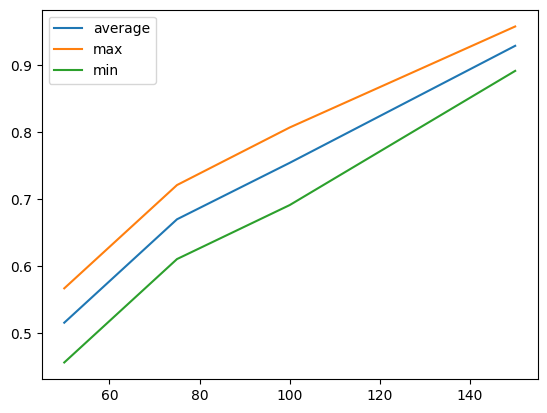

In [62]:
f0 = (1 / (2 * pi * sqrt(L * C)))
valeurs_Rvar = [50, 75, 100, 150]
valeurs_fr = [3e3, 2.6e3, 2.3e3, 1.3e3]
incertitudes_fr = [i / sqrt(3) for i in [200, 300, 400, 500]]

valeurs_abscisse = [sqrt(1 - ((fr ** 2) / (f0 ** 2))) for fr in valeurs_fr]
valeurs_abscisse_max = [sqrt(1 - ((fr - ir) ** 2) / (f0 ** 2)) for fr, ir in zip(valeurs_fr, incertitudes_fr)]
valeurs_abscisse_min = [sqrt(1 - ((fr + ir) ** 2) / (f0 ** 2)) for fr, ir in zip(valeurs_fr, incertitudes_fr)]

plt.plot(valeurs_Rvar, valeurs_abscisse, label = 'average')
plt.plot(valeurs_Rvar, valeurs_abscisse_max, label = 'max')
plt.plot(valeurs_Rvar, valeurs_abscisse_min, label = 'min')

plt.legend()
plt.show()

La pente est affine croissante comme prévu :) 